### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

In [4]:
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('data/telco_churn_data.csv')

In [6]:
df.head(20)

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0
5,4412-YLTKF,No,0,27,Offer C,Yes,3.33,Yes,Yes,Fiber Optic,...,33.989524,-118.089299,63288,1,4638,Competitor,Competitor had better devices,0,0,NaN
6,0390-DCFDQ,Yes,1,1,Offer E,Yes,15.28,No,Yes,Cable,...,33.794990,-118.065591,21343,1,3964,Other,Don't know,7,0,NaN
7,3445-HXXGF,Yes,6,58,Offer B,No,0.00,No,Yes,Cable,...,34.168686,-118.057505,10558,1,5444,Dissatisfaction,Service dissatisfaction,2,1,1.0
8,2656-FMOKZ,No,0,15,Offer D,Yes,44.07,Yes,Yes,Cable,...,34.139402,-118.128658,23742,1,5717,Dissatisfaction,Limited range of services,3,0,2.0
9,2070-FNEXE,No,0,7,Offer E,Yes,26.95,No,Yes,DSL,...,34.159007,-118.087353,32369,1,4419,Price,Lack of affordable download/upload speed,3,0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [8]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [9]:
object_cols = df.select_dtypes('object').columns.tolist() + ['Customer ID', 'Churn Value']
df_clean = df.drop(object_cols, axis = 1)

# drop discrete columns or low unique values
df_clean = df_clean.drop(['Product/Service Issues Reported','Total Customer Svc Requests','Number of Dependents','Number of Referrals','Longitude','Latitude'], axis=1)
df_clean_nona = df_clean.dropna()

In [10]:
df_clean_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1834 entries, 3 to 7040
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tenure in Months                   1834 non-null   int64  
 1   Avg Monthly Long Distance Charges  1834 non-null   float64
 2   Avg Monthly GB Download            1834 non-null   int64  
 3   Monthly Charge                     1834 non-null   float64
 4   Total Regular Charges              1834 non-null   float64
 5   Total Refunds                      1834 non-null   float64
 6   Total Extra Data Charges           1834 non-null   float64
 7   Total Long Distance Charges        1834 non-null   float64
 8   Age                                1834 non-null   int64  
 9   Zip Code                           1834 non-null   int64  
 10  Population                         1834 non-null   int64  
 11  CLTV                               1834 non-null   int64  
 1

In [11]:
#df_scaled = (df_clean_nona - df_clean_nona.mean())/df_clean_nona.std()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean_nona), columns=df_clean_nona.columns)

In [12]:
from pprint import pprint
for col in df_scaled.columns.tolist():
    pprint(f"++++++++++++++++++{col}++++++++++++++++++")
    pprint(f"{df_scaled[col].unique()} : {df_scaled[col].nunique()}")
    print()
  

'++++++++++++++++++Tenure in Months++++++++++++++++++'
('[-2.44949763e-01  2.44816239e-01  1.10190674e+00 -6.53088097e-01\n'
 ' -8.16343431e-01 -1.14285410e+00 -7.34715764e-01 -1.10204026e+00\n'
 ' -1.18366793e+00 -1.22448177e+00 -1.06122643e+00 -4.49018930e-01\n'
 '  7.34582240e-01  4.89699239e-01  8.57023740e-01 -8.97971098e-01\n'
 '  1.63188572e-01 -9.38784931e-01  5.30513073e-01  8.15609049e-02\n'
 ' -1.63322096e-01 -4.08205096e-01 -6.12274264e-01 -9.79598764e-01\n'
 ' -3.67391263e-01 -7.75529597e-01  1.06109291e+00  2.85630072e-01\n'
 '  4.07470714e-02 -8.16944289e-02 -5.71460430e-01  3.26443905e-01\n'
 ' -8.57157264e-01  1.59167274e+00  7.75396073e-01 -4.08805954e-02\n'
 '  1.67330041e+00 -2.04135929e-01  9.38651407e-01  1.51004508e+00\n'
 ' -2.85763596e-01 -1.22508262e-01  1.42841741e+00 -6.67619958e-05\n'
 '  4.08071572e-01  1.02027907e+00  1.38760357e+00  2.04002405e-01\n'
 '  3.67257739e-01 -4.89832763e-01  6.52954573e-01  1.22374738e-01\n'
 ' -1.02041260e+00 -6.93901930e-01 

In [13]:
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(df_scaled)

In [14]:
pdf=pd.DataFrame(data=components,columns=['principal component 1','principal component 2'])
pdf.rename(columns={'principal component 1':'Principal Component 1','principal component 2':'Principal Component 2'}, inplace=True)
df_tar = df.copy()
df_tar = df_tar[['Churn Value']]
df_tar.rename(columns={'Churn Value':'Churn'}, inplace=True)
#df_tar.value_counts()
data_plt=pd.concat([pdf,df_tar],axis=1)
data_plt.head()

,Principal Component 1,Principal Component 2,Churn
0,0.143065,-0.130604,1
1,-0.627898,0.284800,1
2,0.194560,-0.055801,1
3,-0.219011,-0.211841,1
4,-0.618990,1.044559,1


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

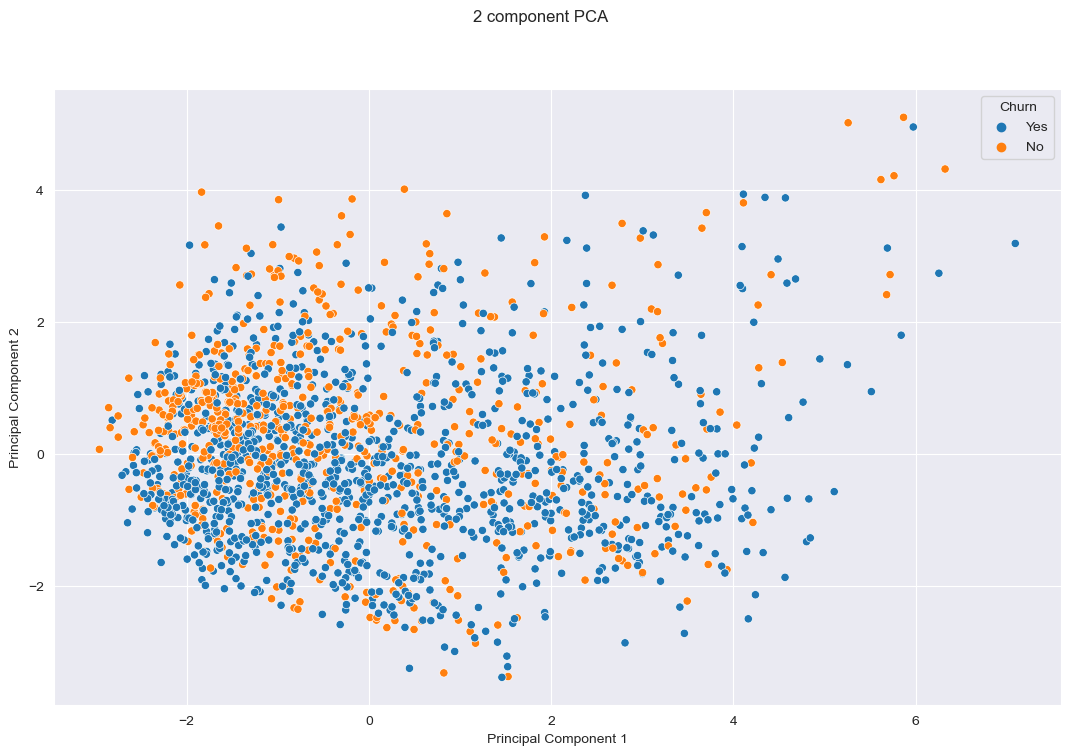

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(13, 8))
fig.suptitle('2 component PCA')
sns.scatterplot(data=data_plt, x='Principal Component 1', y='Principal Component 2', hue=data_plt['Churn'].apply(lambda x: 'Yes' if x == 1 else 'No'))

<Axes: xlabel='Number of Clusters'>

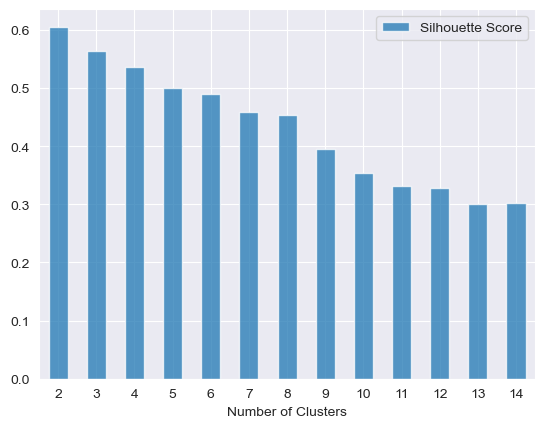

In [16]:
# Components generation
score_list=[]
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters).fit(df_clean_nona)
    preds = clusterer.predict(df_clean_nona)
    centers = clusterer.cluster_centers_

    score = silhouette_score (df_clean_nona, preds, metric='euclidean')
    score_list.append(score)
    #print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
pd_plt = pd.DataFrame(score_list,range(2,15)).reset_index()
pd_plt.rename(columns={'index':'Number of Clusters',0:'Silhouette Score'}, inplace=True)
pd_plt.plot(kind='bar', x='Number of Clusters', y='Silhouette Score', rot=0, alpha=0.75)

In [17]:
## Determine the best value for k
inertia = np.array([])
k_vals = range(1,15)

for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(components)
    kmeans.fit(df_scaled)
    inertia = np.append(inertia, kmeans.inertia_)

inertia_vals = pd.DataFrame(inertia, index=k_vals, columns=['Inertia'])

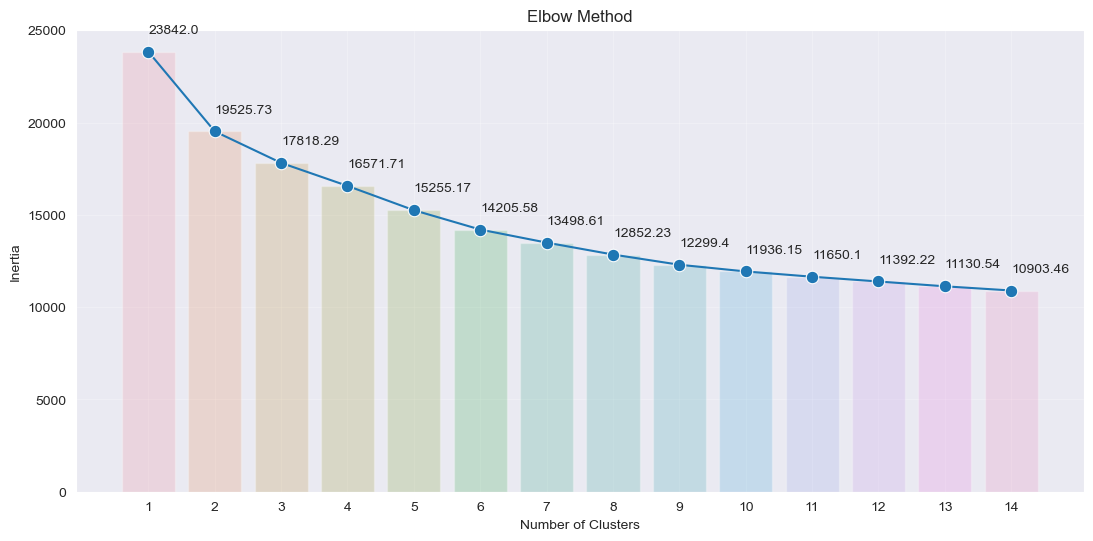

In [18]:
import matplotlib.pyplot as plt10
from importlib import reload
plt=reload(plt10)
plt10.rcParams['figure.figsize'] = (13,6)
plt10.rcParams['figure.max_open_warning'] = False
sns.barplot(x=inertia_vals.index, y=inertia_vals.Inertia, alpha=0.25)
sns.lineplot(x=inertia_vals.index-1, y=inertia_vals.Inertia, marker='o', markersize=9, legend=False)
plt10.title('Elbow Method')
plt10.xticks(inertia_vals.index-1)
plt10.xlabel('Number of Clusters')
plt10.ylabel('Inertia')
for i in inertia_vals.index:
    plt10.text(
        x=i-1,
        y=inertia_vals.Inertia[i]+1000,
        s=round(inertia_vals.Inertia[i], 2)
    )
plt10.grid(alpha=0.25)

In [19]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(df_scaled)
df_copy = df.copy()
df_copy.drop(columns=['Offer','Internet Type','Churn Category','Churn Reason'], inplace=True)
df_copy.dropna(inplace=True)
df_clustered = df_copy.copy()
df_clustered.drop(columns=['Latitude','Longitude'], inplace=True)
df_clustered['cluster'] = kmeans.labels_ + 1
df_clustered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1834 entries, 3 to 7040
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        1834 non-null   object 
 1   Referred a Friend                  1834 non-null   object 
 2   Number of Referrals                1834 non-null   int64  
 3   Tenure in Months                   1834 non-null   int64  
 4   Phone Service                      1834 non-null   object 
 5   Avg Monthly Long Distance Charges  1834 non-null   float64
 6   Multiple Lines                     1834 non-null   object 
 7   Internet Service                   1834 non-null   object 
 8   Avg Monthly GB Download            1834 non-null   int64  
 9   Online Security                    1834 non-null   object 
 10  Online Backup                      1834 non-null   object 
 11  Device Protection Plan             1834 non-null   object 
 1

In [20]:
target=pd.DataFrame(kmeans.labels_,columns=['target'])
data_plt_km=pd.concat([pdf,target],axis=1)
data_plt_km.head()

,Principal Component 1,Principal Component 2,target
0,0.143065,-0.130604,0
1,-0.627898,0.284800,0
2,0.194560,-0.055801,0
3,-0.219011,-0.211841,0
4,-0.618990,1.044559,0


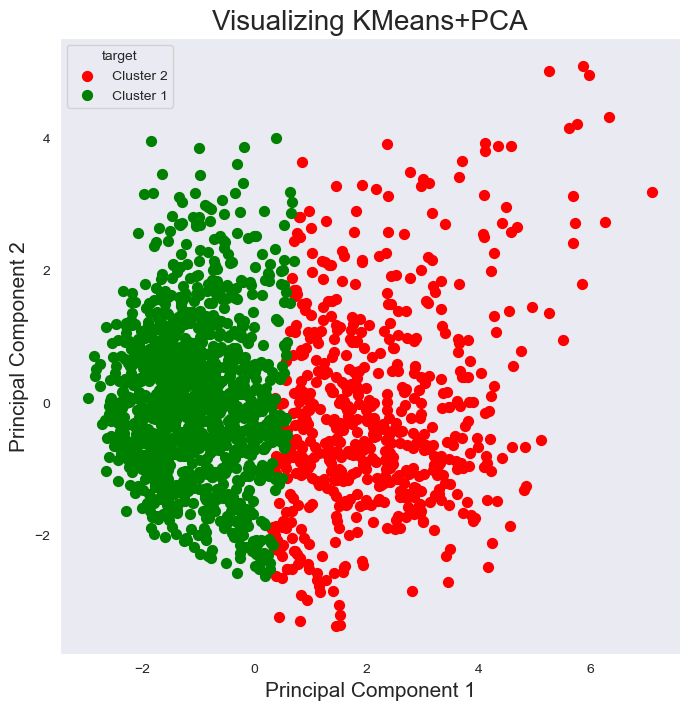

In [21]:
import matplotlib.pyplot as plt2
fig = plt2.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Visualizing KMeans+PCA', fontsize = 20)
targets = ['Cluster 2','Cluster 1',]
colors = ['r', 'g',]
for target, color in zip(targets,colors):
    indicesToKeep = data_plt_km['target'].apply(lambda x: 'Cluster 2' if x == 1 else 'Cluster 1') == target
    ax.scatter(data_plt_km.loc[indicesToKeep, 'Principal Component 1']
               , data_plt_km.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets, title='target')
ax.grid()

In [22]:
df_clustered

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Number of Dependents,City,Zip Code,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction,cluster
3,4598-XLKNJ,Yes,1,25,Yes,19.76,No,Yes,13,No,...,1,Inglewood,90303,27778,1,5337,1,1,2.0,1
4,4846-WHAFZ,Yes,1,37,Yes,6.33,Yes,Yes,15,No,...,1,Whittier,90602,26265,1,2793,1,0,2.0,1
7,3445-HXXGF,Yes,6,58,No,0.00,No,Yes,26,No,...,0,Sierra Madre,91024,10558,1,5444,2,1,1.0,1
8,2656-FMOKZ,No,0,15,Yes,44.07,Yes,Yes,21,No,...,2,Pasadena,91106,23742,1,5717,3,0,2.0,1
10,0094-OIFMO,No,0,11,Yes,11.59,No,Yes,32,No,...,1,North Hollywood,91605,57146,1,5980,2,2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,9586-JGQKH,Yes,8,64,Yes,49.26,Yes,Yes,18,No,...,0,Cathedral City,92234,43141,0,4512,1,0,3.0,2
7026,4807-IZYOZ,No,0,51,Yes,19.23,No,No,0,No,...,0,North Palm Springs,92258,732,0,4725,1,0,3.0,1
7029,7203-OYKCT,No,0,72,Yes,33.93,Yes,Yes,18,No,...,0,Palo Verde,92266,291,0,5760,2,1,5.0,2
7034,0871-OPBXW,No,0,2,Yes,6.85,No,No,0,No,...,0,Escondido,92027,48690,0,5191,1,0,3.0,1


In [23]:
no_need_features = ['Customer ID','Referred a Friend','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract','Paperless Billing','Payment Method','Gender','Under 30','Senior Citizen','Married','Dependents','Number of Dependents','Total Customer Svc Requests','Product/Service Issues Reported','Number of Referrals','Churn Value','City','Zip Code']
df_clustered.drop(columns=no_need_features, inplace=True)
for col in df_clustered.columns.tolist():
    pprint(f"++++++++++++++++++{col}++++++++++++++++++")
    pprint(f"{df_clustered[col].unique()} : {df_clustered[col].nunique()}")
    print()    

'++++++++++++++++++Tenure in Months++++++++++++++++++'
('[25 37 58 15 11  3 13  4  2  1  5 20 49 43 52  9 35  8 44 33 27 21 16  7\n'
 ' 22 12 57 38 32 29 17 39 10 70 50 30 72 26 54 68 24 28 66 31 41 56 65 36\n'
 ' 40 19 47 34  6 14 18 42 55 64 71 48 23 53 60 67 46 45 69 59 63 62 51 61] : '
 '72')

'++++++++++++++++++Avg Monthly Long Distance Charges++++++++++++++++++'
'[19.76  6.33  0.   ... 33.93  6.85 29.66] : 1409'

'++++++++++++++++++Avg Monthly GB Download++++++++++++++++++'
('[13 15 26 21 32 31 12  2 11 19 29 24 23  6 20 30 16  7 25 18 10  9  4  3\n'
 '  8 22 14 28 33  0 53  5 27 17 52 45 64 80 57 76 84 56 58 65 94 46 78 90\n'
 ' 51 63 62 69 71 73 41 59 48 75 82 85 47 42] : 62')

'++++++++++++++++++Monthly Charge++++++++++++++++++'
'[102.44   79.56   47.112 ...  40.2   105.4   104.95 ] : 1189'

'++++++++++++++++++Total Regular Charges++++++++++++++++++'
'[2514.5  2868.15 2651.2  ... 7544.3    39.25 7362.9 ] : 1795'

'++++++++++++++++++Total Refunds++++++++++++++++++'
('[13.43  0.

<Axes: xlabel='Monthly Charge', ylabel='Tenure in Months'>

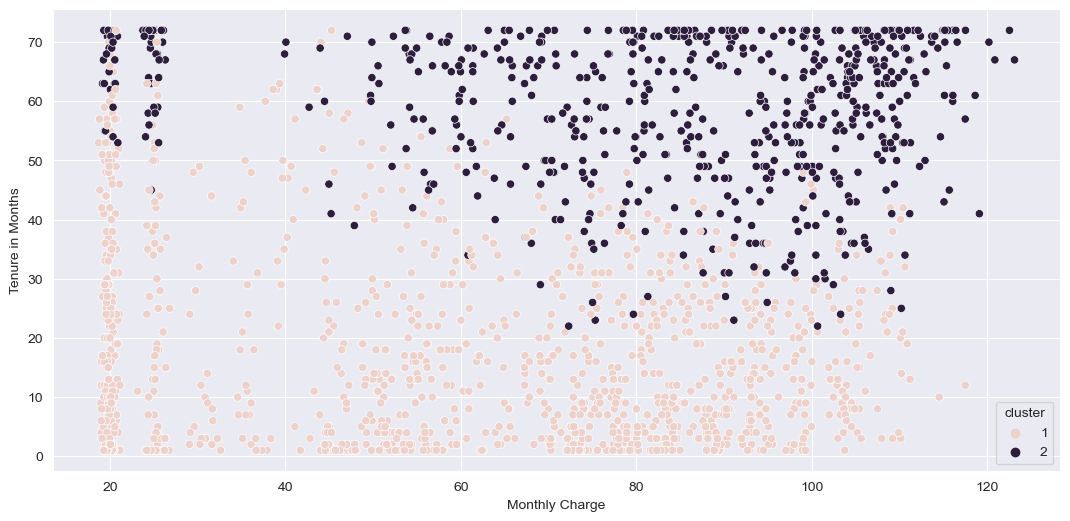

In [24]:
sns.scatterplot(data=df_clustered,x= 'Monthly Charge',y='Tenure in Months', hue='cluster')

#fig = px.scatter(df_clustered,x='Monthly Charge', y='Total Regular Charges', color="cluster")
#fig.show()

In [25]:
df_clustered.columns.tolist()

['Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Regular Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Age',
 'Population',
 'CLTV',
 'Customer Satisfaction',
 'cluster']

In [26]:
df_clustered

,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Population,CLTV,Customer Satisfaction,cluster
3,25,19.76,13,102.440,2514.50,13.43,327.0,494.00,78,27778,5337,2.0,1
4,37,6.33,15,79.560,2868.15,0.00,430.0,234.21,80,26265,2793,2.0,1
7,58,0.00,26,47.112,2651.20,40.95,689.0,0.00,66,10558,5444,1.0,1
8,15,44.07,21,77.428,1145.70,0.00,241.0,661.05,70,23742,5717,2.0,1
10,11,11.59,32,98.800,1120.30,0.00,358.0,127.49,78,57146,5980,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,64,49.26,18,105.400,6794.75,32.24,1223.0,3152.64,61,43141,4512,3.0,2
7026,51,19.23,0,20.650,1020.75,19.32,0.0,980.73,25,732,4725,3.0,1
7029,72,33.93,18,104.950,7544.30,25.42,135.8,2442.96,45,291,5760,5.0,2
7034,2,6.85,0,20.050,39.25,0.00,0.0,13.70,57,48690,5191,3.0,1


In [27]:
df_clustered['cluster'].value_counts()

cluster
1    1218
2     616
Name: count, dtype: int64

In [28]:
## Calculate cluster summary
cluster_summary = df_clustered.groupby('cluster').agg(['mean', 'median', 'std']).transpose()
cluster_summary.columns = ['Cluster 1', 'Cluster 2']
cluster_summary

Cluster 1     Cluster 2
Tenure in Months                  mean       17.273399     58.146104
                                  median     12.000000     61.000000
                                  std        16.275866     12.439960
Avg Monthly Long Distance Charges mean       21.189836     26.724740
                                  median     19.685000     28.415000
                                  std        15.419920     14.701852
Avg Monthly GB Download           mean       19.210181     28.801948
                                  median     15.000000     23.000000
                                  std        19.656378     23.416409
Monthly Charge                    mean       59.769095     82.976893
                                  median     61.588000     88.860000
                                  std        28.522393     25.772705
Total Regular Charges             mean      926.549212   4758.528734
                                  median    651.400000   4712.675000
                                  std       915.735319   1838.419594
Total Refunds                     mean        1.662126      2.939221
                                  median      0.000000      0.000000
                                  std         7.281910      9.451082
Total Extra Data Charges          mean       93.456831    750.837045
                                  median      0.000000    114.625000
                                  std       209.158949   1159.469325
Total Long Distance Charges       mean      312.452718   1517.103198
                                  median    152.210000   1502.220000
                                  std       382.112341    896.552445
Age                               mean       47.730706     44.548701
                                  median     48.000000     42.000000
                                  std        16.434219     17.153280
Population                        mean    22540.334154  22521.293831
                                  median  18518.000000  17015.000000
                                  std     20809.702702  21396.633381
CLTV                              mean     4035.795567   5065.045455
                                  median   4097.000000   5099.000000
                                  std      1166.495284    860.845163
Customer Satisfaction             mean        2.819376      3.373377
                                  median      3.000000      3.000000
                                  std         1.321170      1.024991

In [29]:
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    index=['Cluster 1', 'Cluster 2'],
    columns=df_clustered.columns
)

In [30]:
## View centroids
print('Cluster centroids:\n')
for i in centroids.index:
    print(i)
    for col in centroids.columns:
        print(f'{col}: {round(centroids[col][i], 2)}')
    print()

Cluster centroids:

Cluster 1
Tenure in Months: 17.27
Avg Monthly Long Distance Charges: 21.19
Avg Monthly GB Download: 19.21
Monthly Charge: 59.77
Total Regular Charges: 926.55
Total Refunds: 1.66
Total Extra Data Charges: 93.46
Total Long Distance Charges: 312.45
Age: 47.73
Population: 93436.13
CLTV: 22540.33
Customer Satisfaction: 4035.8
cluster: 2.82

Cluster 2
Tenure in Months: 58.15
Avg Monthly Long Distance Charges: 26.72
Avg Monthly GB Download: 28.8
Monthly Charge: 82.98
Total Regular Charges: 4758.53
Total Refunds: 2.94
Total Extra Data Charges: 750.84
Total Long Distance Charges: 1517.1
Age: 44.55
Population: 93444.56
CLTV: 22521.29
Customer Satisfaction: 5065.05
cluster: 3.37


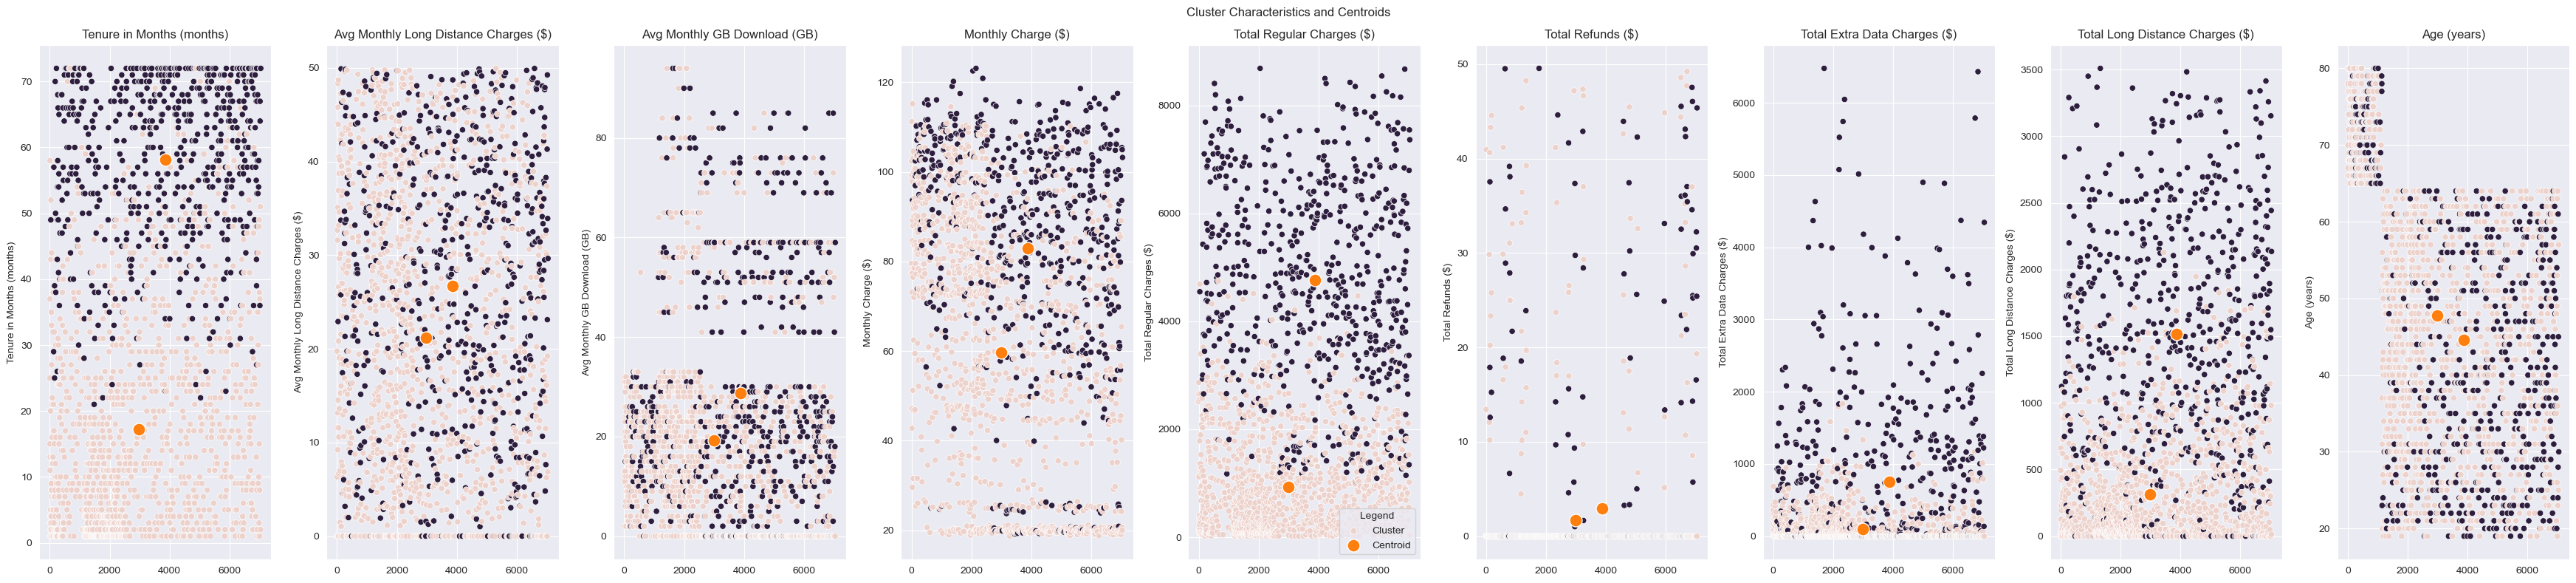

In [31]:
centr_x = [sum(df_clustered[df_clustered.cluster==1].index)/len(df_clustered[df_clustered.cluster==1]), sum(df_clustered[df_clustered.cluster==2].index)/len(df_clustered[df_clustered.cluster==2])]
titles = [
    'Tenure in Months (months)',
    'Avg Monthly Long Distance Charges ($)',
    'Avg Monthly GB Download (GB)',
    'Monthly Charge ($)',
    'Total Regular Charges ($)',
    'Total Refunds ($)',
    'Total Extra Data Charges ($)',
    'Total Long Distance Charges ($)',
    'Age (years)',
    
]
y_labels = [
    'Tenure in Months (months)',
    'Avg Monthly Long Distance Charges ($)',
    'Avg Monthly GB Download (GB)',
    'Monthly Charge ($)',
    'Total Regular Charges ($)',
    'Total Refunds ($)',
    'Total Extra Data Charges ($)',
    'Total Long Distance Charges ($)',
    'Age (years)',
    
]
fig,ax = plt.subplots(1,9,figsize=(35, 8))
plt.suptitle('Cluster Characteristics and Centroids')
for i in range(9):
    sns.scatterplot(x=df_clustered.index, y=df_clustered[df_clustered.columns[i]], hue=df_clustered.cluster, ax=ax[i], legend=False)
    sns.scatterplot(x=centr_x, y=centroids[centroids.columns[i]], s=150, ax=ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_ylabel(y_labels[i])
ax[4].legend(['Cluster', 'Centroid'], title='Legend', loc='lower right')
plt.tight_layout()